## Meter Readings datasets

Since we have the meter readings for various types of energy sources like hotwater, gas and solar - let us first integrate all the data tablesinto one dataframe with all the meter readings for modelling ease. 

In [1]:
# Importing the required libraries 
import pandas as pd
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# Specifying the filepath for the raw data and the cleaned file
path_raw = "../data/meters/raw/"
path_cleaned = "../data/meters/cleaned/"

In [3]:
# Files in directory
files = glob(path_raw + "*.csv")
files

['../data/meters/raw/hotwater.csv',
 '../data/meters/raw/gas.csv',
 '../data/meters/raw/solar.csv',
 '../data/meters/raw/electricity.csv',
 '../data/meters/raw/water.csv',
 '../data/meters/raw/chilledwater.csv',
 '../data/meters/raw/irrigation.csv',
 '../data/meters/raw/steam.csv']

In [4]:
# Wrangling the data in a manner that concats all the above files pivots it into a usable format 

# Initiliase list to store all the data frames 
dfs = []  

for file in files:  
   # Get meter type from filename
    meter_type = file.split("/")[-1].split(".")[0]  
    file_path = file  
    meter = pd.read_csv(file_path) 
    
    # Pivoting the dataset 
    meter = pd.melt(meter, id_vars="timestamp", var_name="building_id", value_name="meter_reading")
    meter["meter"] = meter_type  
    dfs.append(meter) 

# Concatenate all DataFrames in the list into one DataFrame
complete_data = pd.concat(dfs, axis=0, ignore_index=True)

# Inspecting the dataset 
complete_data.sample(5)

,timestamp,building_id,meter_reading,meter
27603028,2016-09-20 04:00:00,Hog_office_Judith,0.0000,electricity
17755728,2016-02-20 00:00:00,Bear_education_Chad,598.4326,electricity
19865635,2016-08-30 19:00:00,Lamb_education_Jane,5.7000,electricity
17396294,2017-02-28 14:00:00,Bear_education_Santos,12.5067,electricity
12324254,2016-12-14 14:00:00,Rat_assembly_Jennie,1.0800,electricity


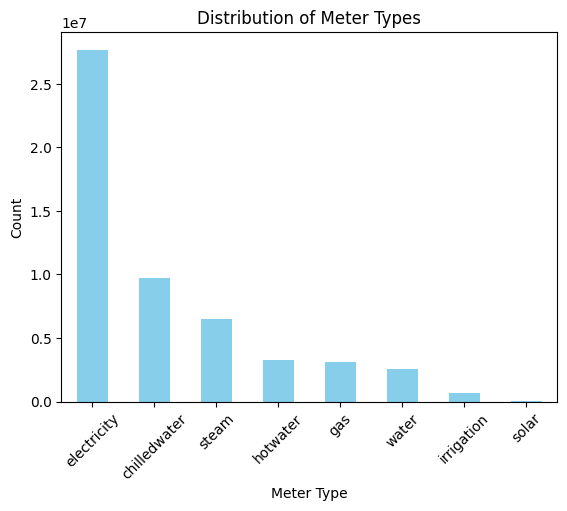

In [5]:
# Check the meter counts 
meter_counts = complete_data["meter"].value_counts()

# Plot the results
meter_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Meter Types')
plt.xlabel('Meter Type')
plt.ylabel('Count')
plt.xticks(rotation=45) 
plt.show()

Electricity meters are significantly more prevalent than other types, highlighting a primary focus on electrical consumption. Chilledwater and steam meters suggest attention to climate control, whereas other utilities like gas and water are monitored less frequently. The least common meter type is solar.

In [6]:
# Check number of buildings for which the data is recorded 
len(np.unique(complete_data["building_id"]))

1636

In [7]:
# Rounds meter reading to to 4 decimals places 
complete_data["meter_reading"] = round(complete_data["meter_reading"],4)

# Inspecting the Data Again
complete_data.sample(7)

,timestamp,building_id,meter_reading,meter
31178841,2016-05-11 09:00:00,Eagle_education_Brooke,818.3372,electricity
8865374,2016-08-23 14:00:00,Robin_office_Victor,95.6230,electricity
17281046,2016-01-09 14:00:00,Bear_education_Chana,16.7500,electricity
6644911,2017-07-07 07:00:00,Panther_education_Tina,3.4006,electricity
11411210,2016-11-13 02:00:00,Fox_education_Wendell,524.7100,electricity
33111724,2016-09-15 04:00:00,Cockatoo_office_Margaret,2.5500,electricity
12802129,2017-06-07 01:00:00,Rat_public_Chrissy,58.0300,electricity


Meter reading are currently hourly as we can see, although we do not need the data to be as granular and hence we will group by day to get hourly meter readings. 

In [8]:
# Convert 'timestamp' to datetime 
complete_data['timestamp'] = pd.to_datetime(complete_data['timestamp'])
# Create a new date column from 'timestamp' for grouping
complete_data['date'] = complete_data['timestamp'].dt.date

numeric_cols = [col for col in complete_data.columns if complete_data[col].dtype.kind in 'biufc' and col not in ['date', 'timestamp']]

# Grouping by building ID, meter type and date 
grouped_data = complete_data.groupby(by=["building_id", "meter", "date"])[numeric_cols].sum().reset_index()
grouped_data.sample(5)

,building_id,meter,date,meter_reading
411979,Cockatoo_education_Claudine,electricity,2017-03-02,1036.0000
1359765,Lamb_assembly_Kurt,gas,2016-04-15,493.4430
1292038,Hog_office_Shon,electricity,2016-12-27,1638.5540
722029,Eagle_office_Chauncey,electricity,2017-06-16,13986.7089
593389,Crow_education_Winston,electricity,2017-07-02,10410.4370


In [9]:
# Generate the cleaned file for meter readings, grouped by day
grouped_data.to_csv(path_cleaned + "allmeters_daily.csv", index=False)

In [10]:
all_meters_daily = pd.read_csv(path_cleaned + "allmeters_daily.csv")
all_meters_daily.head()

,building_id,meter,date,meter_reading
0,Bear_assembly_Angel,electricity,2016-01-01,12808.1620
1,Bear_assembly_Angel,electricity,2016-01-02,9251.0003
2,Bear_assembly_Angel,electricity,2016-01-03,14071.6500
3,Bear_assembly_Angel,electricity,2016-01-04,12860.3758
4,Bear_assembly_Angel,electricity,2016-01-05,12212.8585
